<a href="https://colab.research.google.com/github/AbdeChk/AbdeChk/blob/main/Titanic_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read, clean and process data

In [222]:
#@title Default title text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings
from google.colab import drive
warnings.filterwarnings("ignore")
%matplotlib inline

drive.mount('/content/drive')

df = pd.read_csv("drive/My Drive/dataset/train.csv")
test = pd.read_csv("drive/My Drive/dataset/test.csv")

df.sample(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [223]:
df.shape

(891, 12)

In [224]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [225]:
# Remove the unwanted columns
df = df.drop('PassengerId', axis=1,)
df = df.drop('Name', axis=1,)
df = df.drop('Ticket', axis=1,)
df = df.drop('Cabin', axis=1,)


In [226]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [227]:
# the two columns ('SibSp' and 'Parch') are the same, so we will merge them together

df['Family'] = df['SibSp'] + df['Parch'] 
df 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0
887,1,1,female,19.0,0,0,30.0000,S,0
888,0,3,female,NaN,1,2,23.4500,S,3
889,1,1,male,26.0,0,0,30.0000,C,0


In [228]:
df = df.drop('SibSp', axis=1,)
df = df.drop('Parch', axis=1,)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,NaN,23.4500,S,3
889,1,1,male,26.0,30.0000,C,0


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [230]:
# We have some NAN values in the age column
# so we replacing Age with median of the column

df["Age"] = df["Age"].fillna(df["Age"].median())

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [231]:
#Replace the NaN value with the most frequent value

print(df["Embarked"].mode())

df["Embarked"] = df["Embarked"].fillna("S")
df.info()

0    S
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [232]:
# We do the same thing with the 'Fare' column
print(df["Fare"].mode())
df["Fare"] = df["Fare"].fillna(8.05)
df.info()

0    8.05
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [233]:
# replace the categorical values with numeric values

df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)
df.Sex.replace(['male', 'female'], [1,0], inplace=True)

df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,1,1
1,1,1,0,38.0,71.2833,2,1
2,1,3,0,26.0,7.9250,1,0
3,1,1,0,35.0,53.1000,1,1
4,0,3,1,35.0,8.0500,1,0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,1,0
887,1,1,0,19.0,30.0000,1,0
888,0,3,0,28.0,23.4500,1,3
889,1,1,1,26.0,30.0000,2,0


In [234]:
df['Fare'] = df['Fare'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


#Data visualization

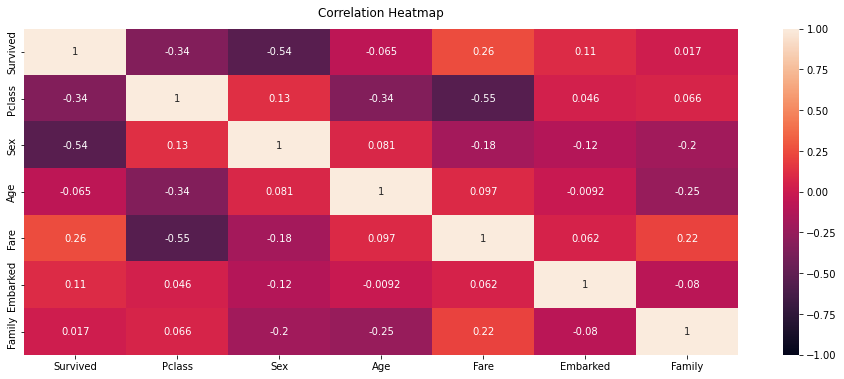

In [235]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [236]:
corr_matrix = df.corr()
corr_matrix['Survived'].sort_values(ascending = False)

Survived    1.000000
Fare        0.257307
Embarked    0.106811
Family      0.016639
Age        -0.064910
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

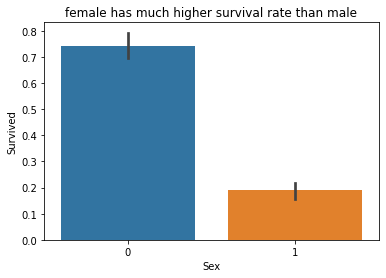

In [237]:
sns.barplot(
    data = df,
    x = "Sex",
    y = "Survived"
)
plt.title('female has much higher survival rate than male')
plt.show()

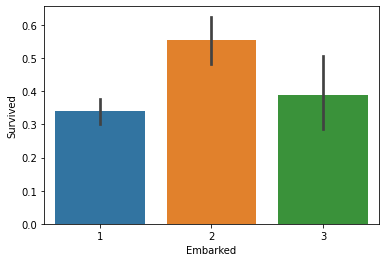

In [238]:
sns.barplot(
    data=df,
    x = "Embarked",
    y = "Survived"
)
plt.show()

#Build and Measuring KNN model

In [262]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

z = df.drop("Survived", axis=1) 

X = z[['Pclass', 'Sex', 'Age']].values #futers
y = df["Survived"].values # target 

# Split into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

knn = KNeighborsClassifier(n_neighbors=9) # neighbors

# Fit the classifier to the training data 
knn.fit(X_train,y_train)

# Print the accuracy 
print(knn.score(X_test, y_test))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

0.7430167597765364
(712, 3)
(179, 3)
(712,)
(179,)


In [263]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 25)

for neighbor in neighbors:
  
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)

In [264]:
 print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
 {1: 0.7528089887640449, 2: 0.8455056179775281, 3: 0.8469101123595506, 4: 0.8174157303370787, 5: 0.7345505617977528, 6: 0.8061797752808989, 7: 0.8216292134831461, 8: 0.8103932584269663, 9: 0.8188202247191011, 10: 0.8174157303370787, 11: 0.8160112359550562, 12: 0.8103932584269663, 13: 0.8202247191011236, 14: 0.7963483146067416, 15: 0.8019662921348315, 16: 0.7907303370786517, 17: 0.7963483146067416, 18: 0.7851123595505618, 19: 0.797752808988764, 20: 0.7907303370786517, 21: 0.7893258426966292, 22: 0.7724719101123596, 23: 0.7823033707865169, 24: 0.7626404494382022} 
 {1: 0.6256983240223464, 2: 0.7486033519553073, 3: 0.7262569832402235, 4: 0.7318435754189944, 5: 0.6368715083798883, 6: 0.7150837988826816, 7: 0.7206703910614525, 8: 0.7374301675977654, 9: 0.7430167597765364, 10: 0.7374301675977654, 11: 0.7430167597765364, 12: 0.7206703910614525, 13: 0.7318435754189944, 14: 0.7262569832402235, 15: 0.7541899441340782, 16:

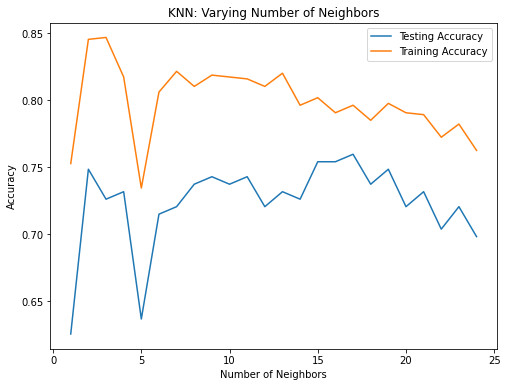

In [265]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, list(test_accuracies.values()), label="Testing Accuracy")
plt.plot(neighbors, list(train_accuracies.values()), label="Training Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [271]:
test = pd.read_csv("drive/My Drive/dataset/test.csv")
test.dtypes


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [272]:
test_set = test[['Pclass', 'Sex', 'Age']].copy()
test_set

,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0
...,...,...,...
413,3,male,NaN
414,1,female,39.0
415,3,male,38.5
416,3,male,NaN


In [273]:
test_set.Sex.replace(['male', 'female'], [1,0], inplace=True)
test_set

,Pclass,Sex,Age
0,3,1,34.5
1,3,0,47.0
2,2,1,62.0
3,3,1,27.0
4,3,0,22.0
...,...,...,...
413,3,1,NaN
414,1,0,39.0
415,3,1,38.5
416,3,1,NaN


In [274]:
test_set["Age"] = test_set["Age"].fillna(df["Age"].median())
test_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.9 KB


In [275]:
final_pred = knn.predict(test_set)
final_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [277]:
test['Survived'] = pd.Series(final_pred, index=test.index)
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [256]:
#test.to_csv("titanic_pred.csv", encoding='utf-8')
